<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_ai_20250630/blob/main/ximen_0702_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
age age in years
sex
bmi body mass index
bp average blood pressure
s1 tc, total serum cholesterol - s2 ldl, low-density lipoproteins
s3 hdl, high-density lipoproteins
s4 tch, total cholesterol / HDL
s5 ltg, possibly log of serum triglycerides level
s6 glu, blood sugar level

```



In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(scaled=False)
# pandas資料型態: 1. DataFrame(2d表格) 2. Series(1d列/行)
df = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
df["y"] = diabetes["target"]
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [3]:
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4],
#                  [5, 6, 7, 8],
#                  test_size=0.25)

# 我先把x(輸入)和y(輸出)分出來
# 第一種: 我拿到最後一個欄位的前面
# x_cols = df.columns[:-1]
# df[x_cols]
# 第二種: drop掉y(記得axis=0/1兩種方向)
x = df.drop("y", axis=1)
y = df["y"]
# 90%x 10%x 90%y 10%y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [4]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 's5 <= 4.6\nsquared_error = 6008.815\nsamples = 397\nvalue = 152.783'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 3257.188\nsamples = 198\nvalue = 110.061'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 2196.083\nsamples = 155\nvalue = 96.858'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4188.925\nsamples = 43\nvalue = 157.651'),
 Text(0.75, 0.5, 'bmi <= 27.75\nsquared_error = 5123.614\nsamples = 199\nvalue = 195.291'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4232.266\nsamples = 103\nvalue = 164.35'),
 Text(0.875, 0.16666666666666666, 'squared_error = 3950.625\nsamples = 96\nvalue = 228.49')]

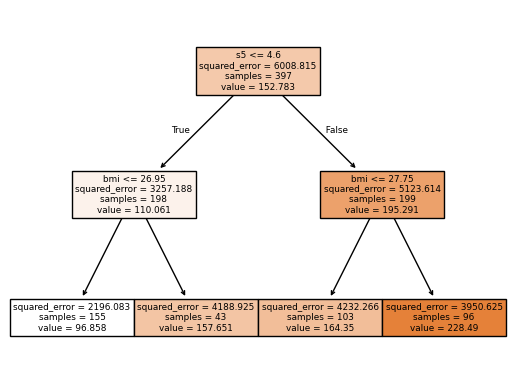

In [5]:
from sklearn.tree import plot_tree
plot_tree(reg,
          max_depth=3,
          feature_names=diabetes["feature_names"],
          filled=True)

In [ ]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print(pre)
accuracy_score(pre, y_test)

[2 0 2 2 1 1 2 1 0 1 2 0 1 1 0]


0.9333333333333333